In [724]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [858]:
# Libraries which might be required
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.preprocessing import MinMaxScaler

import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 6]

Populating the interactive namespace from numpy and matplotlib


In [725]:
stations_class = pd.read_csv('Clean_Data/stations_class_all.csv')

In [726]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5


In [727]:
#stations0 = stations_class[stations_class['label']==0]
#stations1 = stations_class[stations_class['label']==1]
#stations2 = stations_class[stations_class['label']==2]
#stations3 = stations_class[stations_class['label']==3]
#stations4 = stations_class[stations_class['label']==4]
#stations5 = stations_class[stations_class['label']==5]

In [728]:
stations = [stations_class[stations_class['label']==i] for i in range(0,6)]

In [729]:
stations[0].head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
6,82,85.0,109.0,18.0,77.0,25.0,49.0,18.0,60.0,25.0,114.0,43.0,114.0,322.0,119.0,302.0,249.0,1015.0,430.0,843.0,408.0,452.0,302.0,459.0,327.0,522.0,470.0,511.0,519.0,619.0,569.0,583.0,638.0,637.0,685.0,733.0,1073.0,846.0,1027.0,693.0,807.0,417.0,614.0,360.0,428.0,219.0,331.0,136.0,242.0,0
7,83,195.0,174.0,92.0,118.0,51.0,60.0,29.0,44.0,14.0,17.0,20.0,28.0,184.0,64.0,285.0,246.0,546.0,472.0,514.0,542.0,361.0,401.0,515.0,564.0,588.0,682.0,659.0,711.0,662.0,760.0,726.0,782.0,779.0,907.0,930.0,1080.0,1046.0,1244.0,790.0,1301.0,662.0,866.0,638.0,553.0,508.0,345.0,346.0,244.0,0
9,120,43.0,179.0,30.0,89.0,14.0,50.0,12.0,25.0,6.0,8.0,23.0,4.0,145.0,6.0,445.0,28.0,714.0,81.0,608.0,127.0,284.0,137.0,253.0,168.0,248.0,150.0,250.0,206.0,226.0,194.0,214.0,206.0,182.0,251.0,190.0,255.0,241.0,622.0,241.0,597.0,182.0,413.0,160.0,339.0,107.0,262.0,90.0,213.0,0
12,143,92.0,149.0,45.0,81.0,21.0,40.0,10.0,17.0,7.0,13.0,28.0,68.0,151.0,137.0,544.0,239.0,1548.0,744.0,1160.0,554.0,562.0,417.0,558.0,356.0,471.0,425.0,457.0,482.0,501.0,452.0,459.0,516.0,518.0,552.0,585.0,782.0,705.0,1165.0,645.0,1103.0,432.0,672.0,291.0,481.0,206.0,334.0,120.0,217.0,0
13,144,47.0,56.0,11.0,33.0,4.0,22.0,4.0,9.0,0.0,3.0,15.0,9.0,49.0,15.0,178.0,88.0,328.0,319.0,239.0,193.0,245.0,230.0,286.0,259.0,380.0,375.0,410.0,404.0,402.0,421.0,426.0,435.0,408.0,398.0,375.0,448.0,341.0,420.0,260.0,333.0,158.0,190.0,109.0,131.0,105.0,156.0,178.0,79.0,0


In [730]:
dailyDiff = []

for item in stations:
    dailyDiff.append(item.mean()[1:-1])

In [731]:
#dailyDiff[0]

In [732]:
dailystartDiff = []
dailyendDiff = []

for item in dailyDiff:
    dailystartDiff.append(item[list(range(0,48,2))])
    dailyendDiff.append(item[list(range(1,48,2))])

In [733]:
dailyRange = range(0,24)

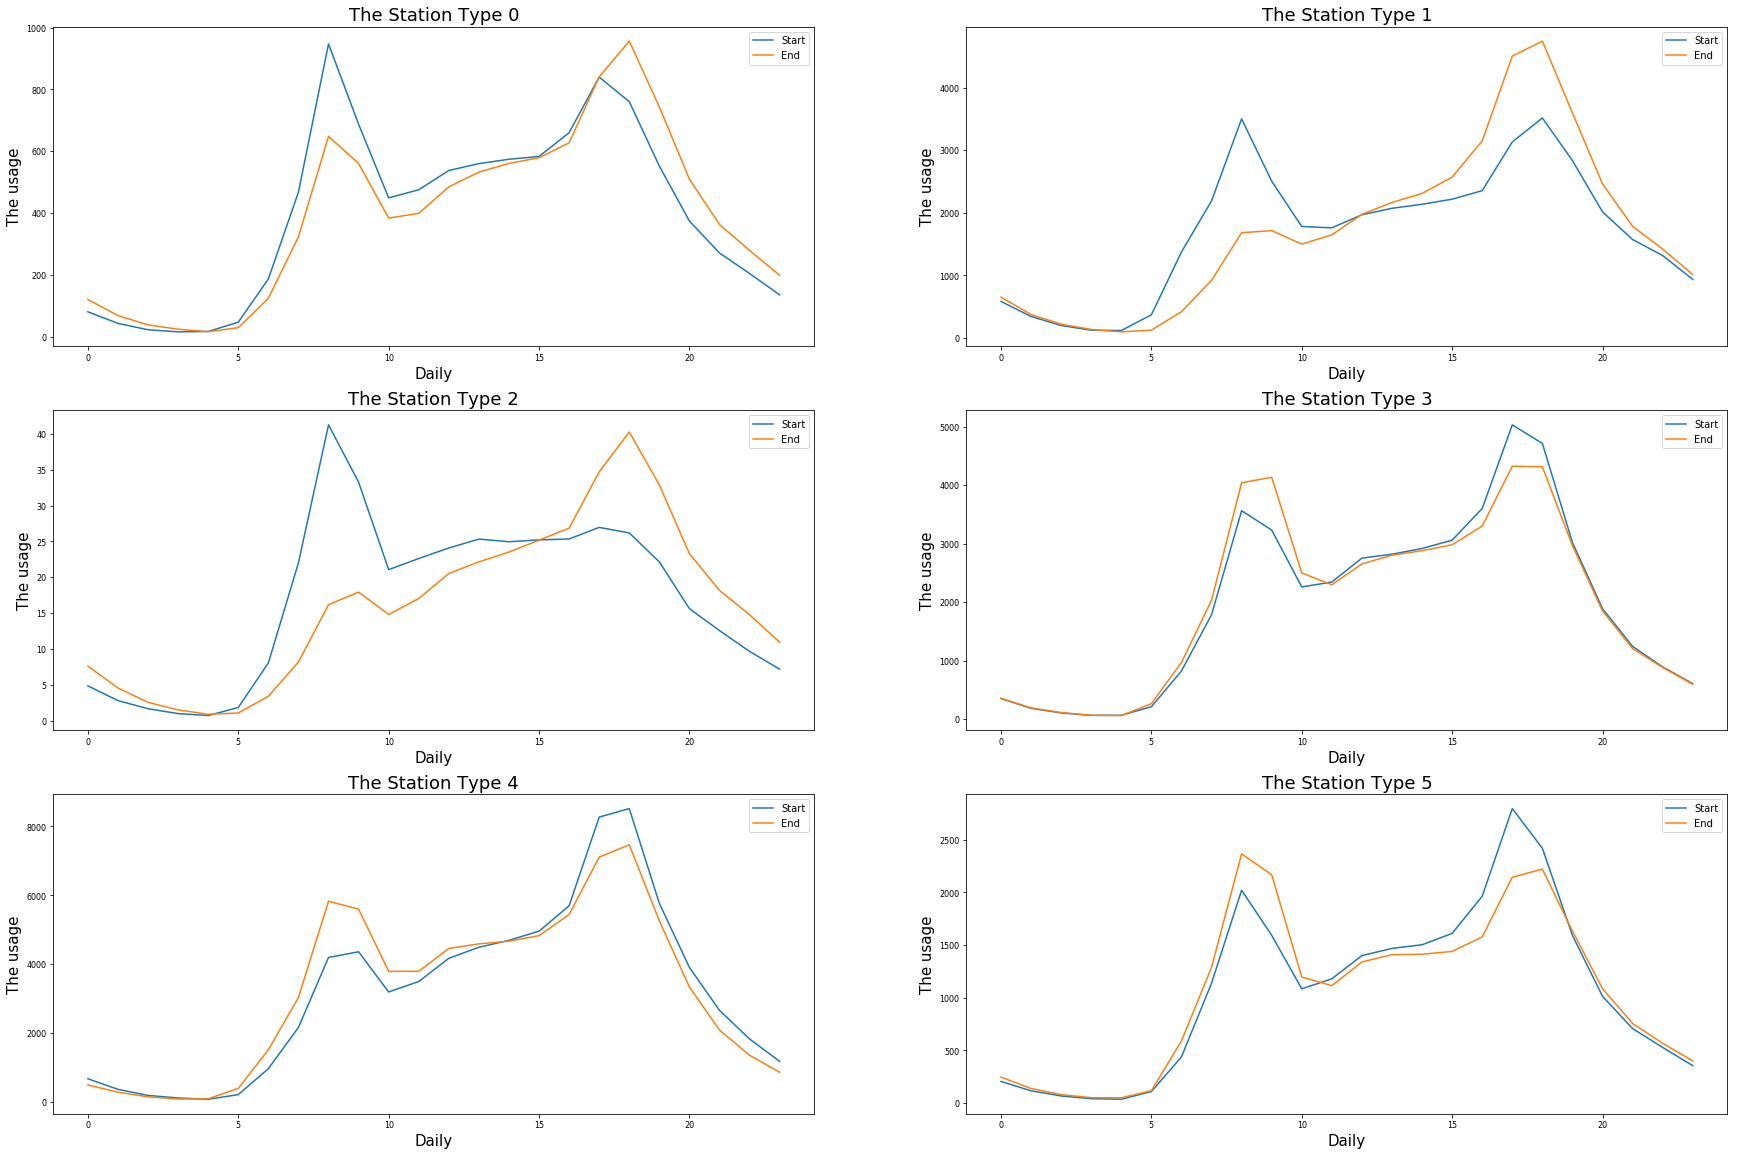

In [734]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, dailystartDiff[i], label="Start")
    ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

#plot(dailyRange, start)
#plot(dailyRange, end)

## Better plot

add x-axis, y-axis and title to explain what is the plot?

Make the start of x-axis and y-axis is 0.

Change the font size and make it clearly.

**plot 6 start line in one figure and plot 6 end line in one figure**

Real time

In [735]:
emptyCount = pd.read_csv('Clean_Data/emptyCount.csv')

In [736]:
emptyCount.head(1)

,capacity,lat,lon,name,short_name,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0


In [737]:
emptyCount.drop(['capacity', 'lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [738]:
emptyCount.head(1)

,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0


In [739]:
stations_class.head(1)

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1


In [740]:
stations_class = stations_class.merge(emptyCount)

In [741]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0


In [742]:
emptys = [stations_class[stations_class['label']==i] for i in range(0,6)]

In [743]:
emptys[0].head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
6,82,85.0,109.0,18.0,77.0,25.0,49.0,18.0,60.0,25.0,114.0,43.0,114.0,322.0,119.0,302.0,249.0,1015.0,430.0,843.0,408.0,452.0,302.0,459.0,327.0,522.0,470.0,511.0,519.0,619.0,569.0,583.0,638.0,637.0,685.0,733.0,1073.0,846.0,1027.0,693.0,807.0,417.0,614.0,360.0,428.0,219.0,331.0,136.0,242.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,5.0,17.0,6.0,2.0,5.0,2.0
7,83,195.0,174.0,92.0,118.0,51.0,60.0,29.0,44.0,14.0,17.0,20.0,28.0,184.0,64.0,285.0,246.0,546.0,472.0,514.0,542.0,361.0,401.0,515.0,564.0,588.0,682.0,659.0,711.0,662.0,760.0,726.0,782.0,779.0,907.0,930.0,1080.0,1046.0,1244.0,790.0,1301.0,662.0,866.0,638.0,553.0,508.0,345.0,346.0,244.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,120,43.0,179.0,30.0,89.0,14.0,50.0,12.0,25.0,6.0,8.0,23.0,4.0,145.0,6.0,445.0,28.0,714.0,81.0,608.0,127.0,284.0,137.0,253.0,168.0,248.0,150.0,250.0,206.0,226.0,194.0,214.0,206.0,182.0,251.0,190.0,255.0,241.0,622.0,241.0,597.0,182.0,413.0,160.0,339.0,107.0,262.0,90.0,213.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,20.0,14.0,17.0,7.0,23.0,13.0,22.0,27.0,7.0,2.0,0.0
12,143,92.0,149.0,45.0,81.0,21.0,40.0,10.0,17.0,7.0,13.0,28.0,68.0,151.0,137.0,544.0,239.0,1548.0,744.0,1160.0,554.0,562.0,417.0,558.0,356.0,471.0,425.0,457.0,482.0,501.0,452.0,459.0,516.0,518.0,552.0,585.0,782.0,705.0,1165.0,645.0,1103.0,432.0,672.0,291.0,481.0,206.0,334.0,120.0,217.0,0,14.0,4.0,6.0,3.0,6.0,20.0,39.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,28.0,14.0
13,144,47.0,56.0,11.0,33.0,4.0,22.0,4.0,9.0,0.0,3.0,15.0,9.0,49.0,15.0,178.0,88.0,328.0,319.0,239.0,193.0,245.0,230.0,286.0,259.0,380.0,375.0,410.0,404.0,402.0,421.0,426.0,435.0,408.0,398.0,375.0,448.0,341.0,420.0,260.0,333.0,158.0,190.0,109.0,131.0,105.0,156.0,178.0,79.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [744]:
#emptys[0]

In [745]:
emptysHour = []

for item in emptys:
    emptysHour.append(item.mean()[50:])

In [746]:
#emptysHour[0]

In [747]:
dailyRange = range(0,24)

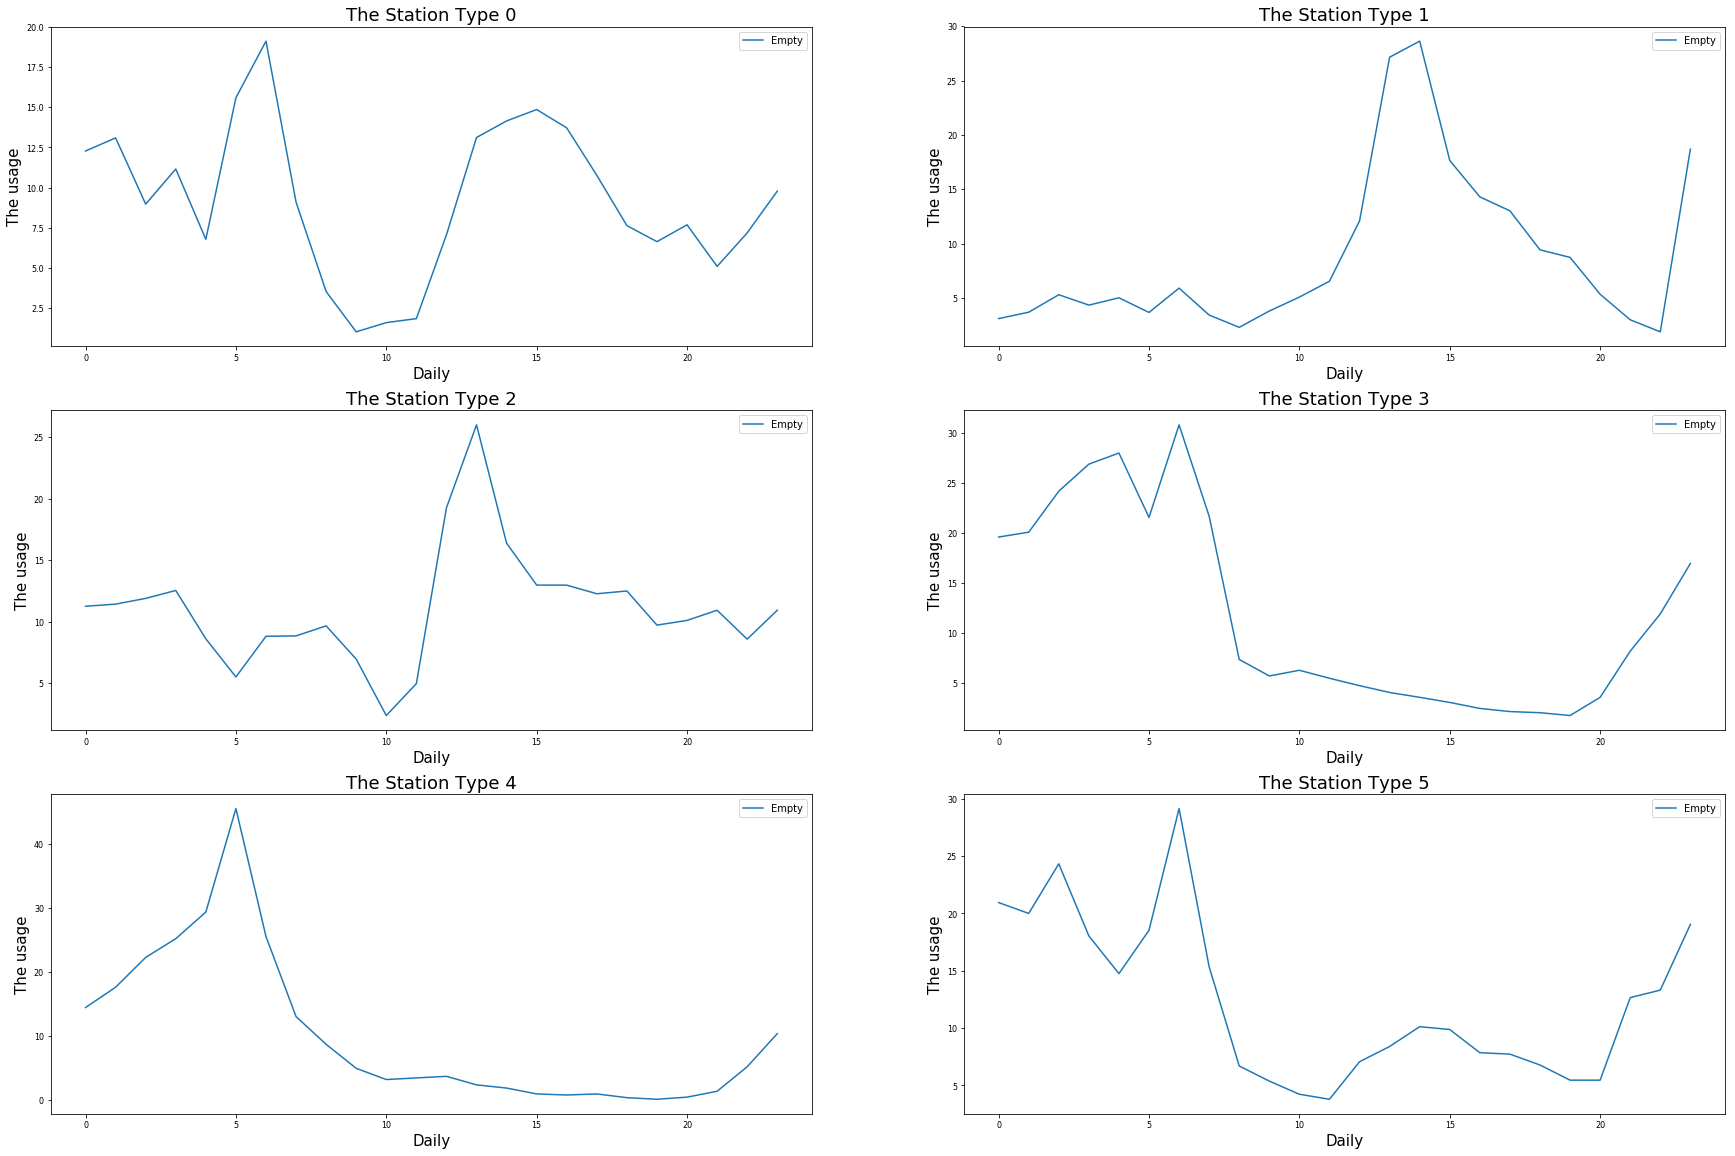

In [748]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, emptysHour[i], label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

## Better plot

add x-axis, y-axis and title to explain what is the plot?

Make the start of x-axis and y-axis is 0.

Change the font size and make it clearly.

**plot 6 empty line in one figure**

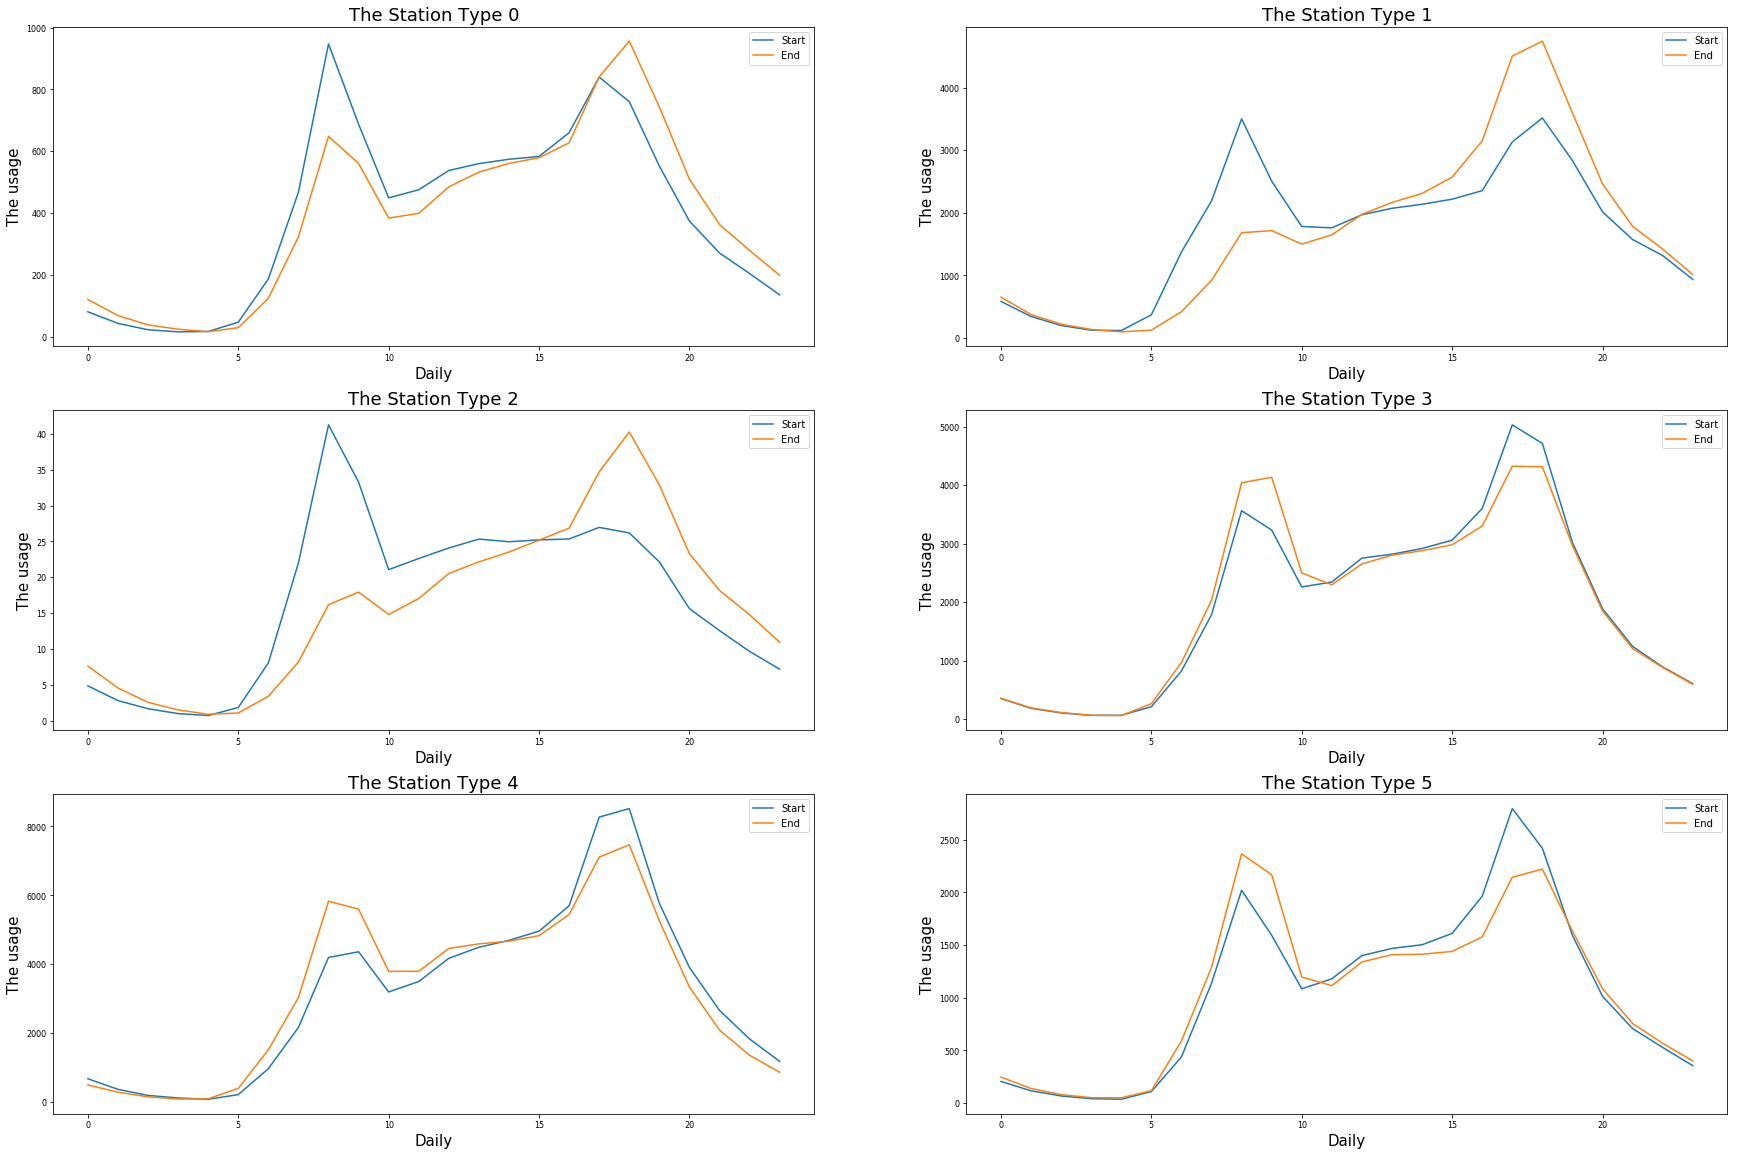

In [749]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, dailystartDiff[i], label="Start")
    ax.plot(dailyRange, dailyendDiff[i], label="End")
    #ax.plot(dailyRange, emptysHour[i]*50, label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

In [750]:
#dailyendDiff[0]

In [751]:
#dailystartDiff[0]

In [752]:
#dailyDiff0 = stations0.mean()[1:-1]
#dailyDiff1 = stations1.mean()[1:-1]
#dailyDiff2 = stations2.mean()[1:-1]
#dailyDiff3 = stations3.mean()[1:-1]
#dailyDiff4 = stations4.mean()[1:-1]
#dailyDiff5 = stations5.mean()[1:-1]

In [753]:
# start0 = []
# end0 = []
# start1 = []
# end1 = []
# start2 = []
# end2 = []
# start3 = []
# end3 = []
# start4 = []
# end4 = []
# start5 = []
# end5 = []


# for i in range(0,48,2):
#     start0.append(dailyDiff0[i])
#     end0.append(dailyDiff0[i+1])
    
#     start1.append(dailyDiff1[i])
#     end1.append(dailyDiff1[i+1])
    
#     start2.append(dailyDiff2[i])
#     end2.append(dailyDiff2[i+1])
    
#     start3.append(dailyDiff3[i])
#     end3.append(dailyDiff3[i+1])
    
#     start4.append(dailyDiff4[i])
#     end4.append(dailyDiff4[i+1])
    
#     start5.append(dailyDiff5[i])
#     end5.append(dailyDiff5[i+1])


#start = []
#start.append(start0).append(start1).append(start2).append(start3).append(start4).append(start5)
#end = []
#end.append(end0).append(end1).append(end2).append(end3).append(end4).append(end5)

## Analyze Vehicle Count

In [754]:
vehicle_count = pd.read_csv('data/vehiclecount.csv')

In [755]:
start_str=[]
end_str =[]
for i in range(len(vehicle_count.index)):
    #print(i)
    start_str.append('startCount_' + str(i))
    end_str.append('endCount_' + str(i))

In [756]:
dailyDiff_pd = pd.DataFrame(dailyDiff)
dailyDiff_tp = dailyDiff_pd.T
dailyDiff_tp.shape

(48, 6)

In [757]:
dailyDiff_pd.head(2)

,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23
0,80.411290,120.346774,42.991935,68.306452,22.435484,38.096774,15.709677,24.274194,16.822581,16.153226,46.895161,29.145161,186.919355,124.225806,467.911290,323.556452,947.475806,648.250000,687.596774,560.540323,449.209677,383.814516,475.475806,399.153226,537.927419,484.943548,560.104839,532.604839,574.217742,560.725806,583.217742,579.016129,660.153226,627.475806,839.991935,841.008065,760.637097,956.491935,552.024194,743.620968,374.225806,509.645161,270.790323,362.895161,204.508065,279.209677,135.403226,198.548387
1,585.173913,653.326087,344.239130,375.608696,200.978261,220.934783,125.152174,137.500000,120.760870,99.543478,371.565217,126.652174,1374.021739,421.173913,2189.673913,921.717391,3499.608696,1681.717391,2504.369565,1715.152174,1780.934783,1500.978261,1760.043478,1647.021739,1968.369565,1976.065217,2071.869565,2165.130435,2136.152174,2308.500000,2217.065217,2569.804348,2353.456522,3149.065217,3130.413043,4501.195652,3514.173913,4740.434783,2833.260870,3592.673913,2014.804348,2461.434783,1573.000000,1783.456522,1317.543478,1420.239130,936.521739,1014.673913


In [758]:
dailystartDiff_pd = pd.DataFrame(dailystartDiff)
dailystartDiff_tp = dailystartDiff_pd.T
dailystartDiff_tp.shape

(24, 6)

In [759]:
dailyendDiff_pd = pd.DataFrame(dailyendDiff)
dailyendDiff_tp = dailyendDiff_pd.T
dailyendDiff_tp.tail(2)

,0,1,2,3,4,5
endCount_22,279.209677,1420.239130,14.780198,882.114286,1363.416667,568.229167
endCount_23,198.548387,1014.673913,10.934653,594.771429,872.083333,400.927083


In [760]:
# start_str=[]
# end_str =[]
# for i in range(len(vehicle_count.index)):
#     #print(i)
#     start_str.append('startCount_' + str(i))
#     end_str.append('endCount_' + str(i))

In [761]:
# startcolumn = []
# endcolumn = []
# for i in range(dailyDiff_tp.shape[1]):
#     startcolumn = dailyDiff_tp.loc[start_str]
#     endcolumn = dailyDiff_tp.loc[end_str]

In [762]:
startcolumn=dailystartDiff_tp
endcolumn=dailyendDiff_tp


In [763]:
dailyDiff_tp.shape

(48, 6)

In [764]:
endcolumn.head(2)

,0,1,2,3,4,5
endCount_0,120.346774,653.326087,7.601980,355.000000,501.833333,247.010417
endCount_1,68.306452,375.608696,4.544554,190.942857,292.416667,138.760417


In [765]:
columnstemp=[]
for i in range(dailyDiff_tp.shape[1]):
    columnstemp.append('St_Count_'+str(i))
columnsendtemp=[]
for i in range(dailyDiff_tp.shape[1]):
    columnsendtemp.append('End_Count_'+str(i))

In [766]:
startcolumn.columns = columnstemp
endcolumn.columns = columnsendtemp

In [767]:
vehicle_count['Time'][0]=vehicle_count['Time'][0].replace(" ", "")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [768]:
startcolumn['Time'] = list(vehicle_count['Time'])
endcolumn['Time'] = list(vehicle_count['Time'])
print(endcolumn.shape,vehicle_count.shape)
startcolumn.head(1)

(24, 7) (24, 3)


,St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,Time
startCount_0,80.41129,585.173913,4.841584,349.771429,682.5,206.072917,12:00-1:00AM


In [769]:
endcolumn['Time'] = list(vehicle_count['Time'])

In [770]:
vehicles_trips_merged = vehicle_count.merge(startcolumn,how='outer', on='Time')
print(vehicles_trips_merged.shape,type(vehicles_trips_merged))
vehicles_trips_merged.tail(2)

(24, 9) <class 'pandas.core.frame.DataFrame'>


,Time,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5
22,10:00-11:00PM,2152386.0,3.656157,204.508065,1317.543478,9.657426,892.228571,1836.666667,528.90625
23,11:00-12:00AM,1893921.0,3.217115,135.403226,936.521739,7.178218,605.942857,1185.666667,355.50000


In [771]:
vehicles_trips_start_end = vehicles_trips_merged.merge(endcolumn,how='outer', on='Time')
print(vehicles_trips_start_end.shape,type(vehicles_trips_start_end))
vehicles_trips_start_end.tail(2)

(24, 15) <class 'pandas.core.frame.DataFrame'>


,Time,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5
22,10:00-11:00PM,2152386.0,3.656157,204.508065,1317.543478,9.657426,892.228571,1836.666667,528.90625,279.209677,1420.239130,14.780198,882.114286,1363.416667,568.229167
23,11:00-12:00AM,1893921.0,3.217115,135.403226,936.521739,7.178218,605.942857,1185.666667,355.50000,198.548387,1014.673913,10.934653,594.771429,872.083333,400.927083


In [772]:
endcolumn.head(2)

,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5,Time
endCount_0,120.346774,653.326087,7.601980,355.000000,501.833333,247.010417,12:00-1:00AM
endCount_1,68.306452,375.608696,4.544554,190.942857,292.416667,138.760417,1:00-2:00AM


## Normalize values

In [773]:
vtse = vehicles_trips_start_end

vtse=vtse.set_index('Time')

vtse.head(2)

,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5
Time,,,,,,,,,,,,,,
12:00-1:00AM,1593980.0,2.707619,80.411290,585.173913,4.841584,349.771429,682.500000,206.072917,120.346774,653.326087,7.601980,355.000000,501.833333,247.010417
1:00-2:00AM,1186001.0,2.014604,42.991935,344.239130,2.790099,182.285714,375.083333,116.864583,68.306452,375.608696,4.544554,190.942857,292.416667,138.760417


In [774]:
keep = [columns for columns in vtse.columns if columns != 'Vehicle_count (%)']
vtse[keep].head(2)

,Total vehicle_count,St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5
Time,,,,,,,,,,,,,
12:00-1:00AM,1593980.0,80.411290,585.173913,4.841584,349.771429,682.500000,206.072917,120.346774,653.326087,7.601980,355.000000,501.833333,247.010417
1:00-2:00AM,1186001.0,42.991935,344.239130,2.790099,182.285714,375.083333,116.864583,68.306452,375.608696,4.544554,190.942857,292.416667,138.760417


In [775]:
vtse.max()

Total vehicle_count    3.568822e+06
Vehicle_count (%)      6.062191e+00
St_Count_0             9.474758e+02
St_Count_1             3.514174e+03
St_Count_2             4.128317e+01
St_Count_3             5.035800e+03
St_Count_4             8.519167e+03
St_Count_5             2.796219e+03
End_Count_0            9.564919e+02
End_Count_1            4.740435e+03
End_Count_2            4.028119e+01
End_Count_3            4.327571e+03
End_Count_4            7.468250e+03
End_Count_5            2.366552e+03
dtype: float64

In [776]:
from sklearn.preprocessing import MinMaxScaler



In [777]:
min_max_scaler_1 = MinMaxScaler()
#df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)
vtse_scaled_1 = pd.DataFrame(min_max_scaler_1.fit_transform(vtse), columns=vtse.columns, index=vtse.index)

In [778]:
keep = [columns for columns in startcolumn.columns if columns != 'Time']
psd_to_scale=startcolumn[keep]

In [779]:
keep = [columns for columns in endcolumn.columns if columns != 'Time']
ped_to_scale=endcolumn[keep]

In [780]:
min_max_scaler_2 = MinMaxScaler()
#df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)
psd_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(psd_to_scale), columns=psd_to_scale.columns, index=psd_to_scale.index)

In [781]:
min_max_scaler_3 = MinMaxScaler()
#df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)
ped_scaled_3 = pd.DataFrame(min_max_scaler_3.fit_transform(ped_to_scale), columns=ped_to_scale.columns, index=ped_to_scale.index)

In [782]:
vtse_scaled_2.head(1)

,Total vehicle_count,Vehicle_count (%),Start_Count_C_0_x,Start_Count_C_1_x,Start_Count_C_2_x,Start_Count_C_3_x,Start_Count_C_4_x,Start_Count_C_5_x,Start_Count_C_0_y,Start_Count_C_1_y,Start_Count_C_2_y,Start_Count_C_3_y,Start_Count_C_4_y,Start_Count_C_5_y
Time,,,,,,,,,,,,,,
12:00-1:00AM,0.280709,0.280709,0.06944,0.136857,0.101986,0.057939,0.070549,0.061325,0.110804,0.119327,0.170453,0.069269,0.05539,0.084625


In [783]:
#ped_scaled_3

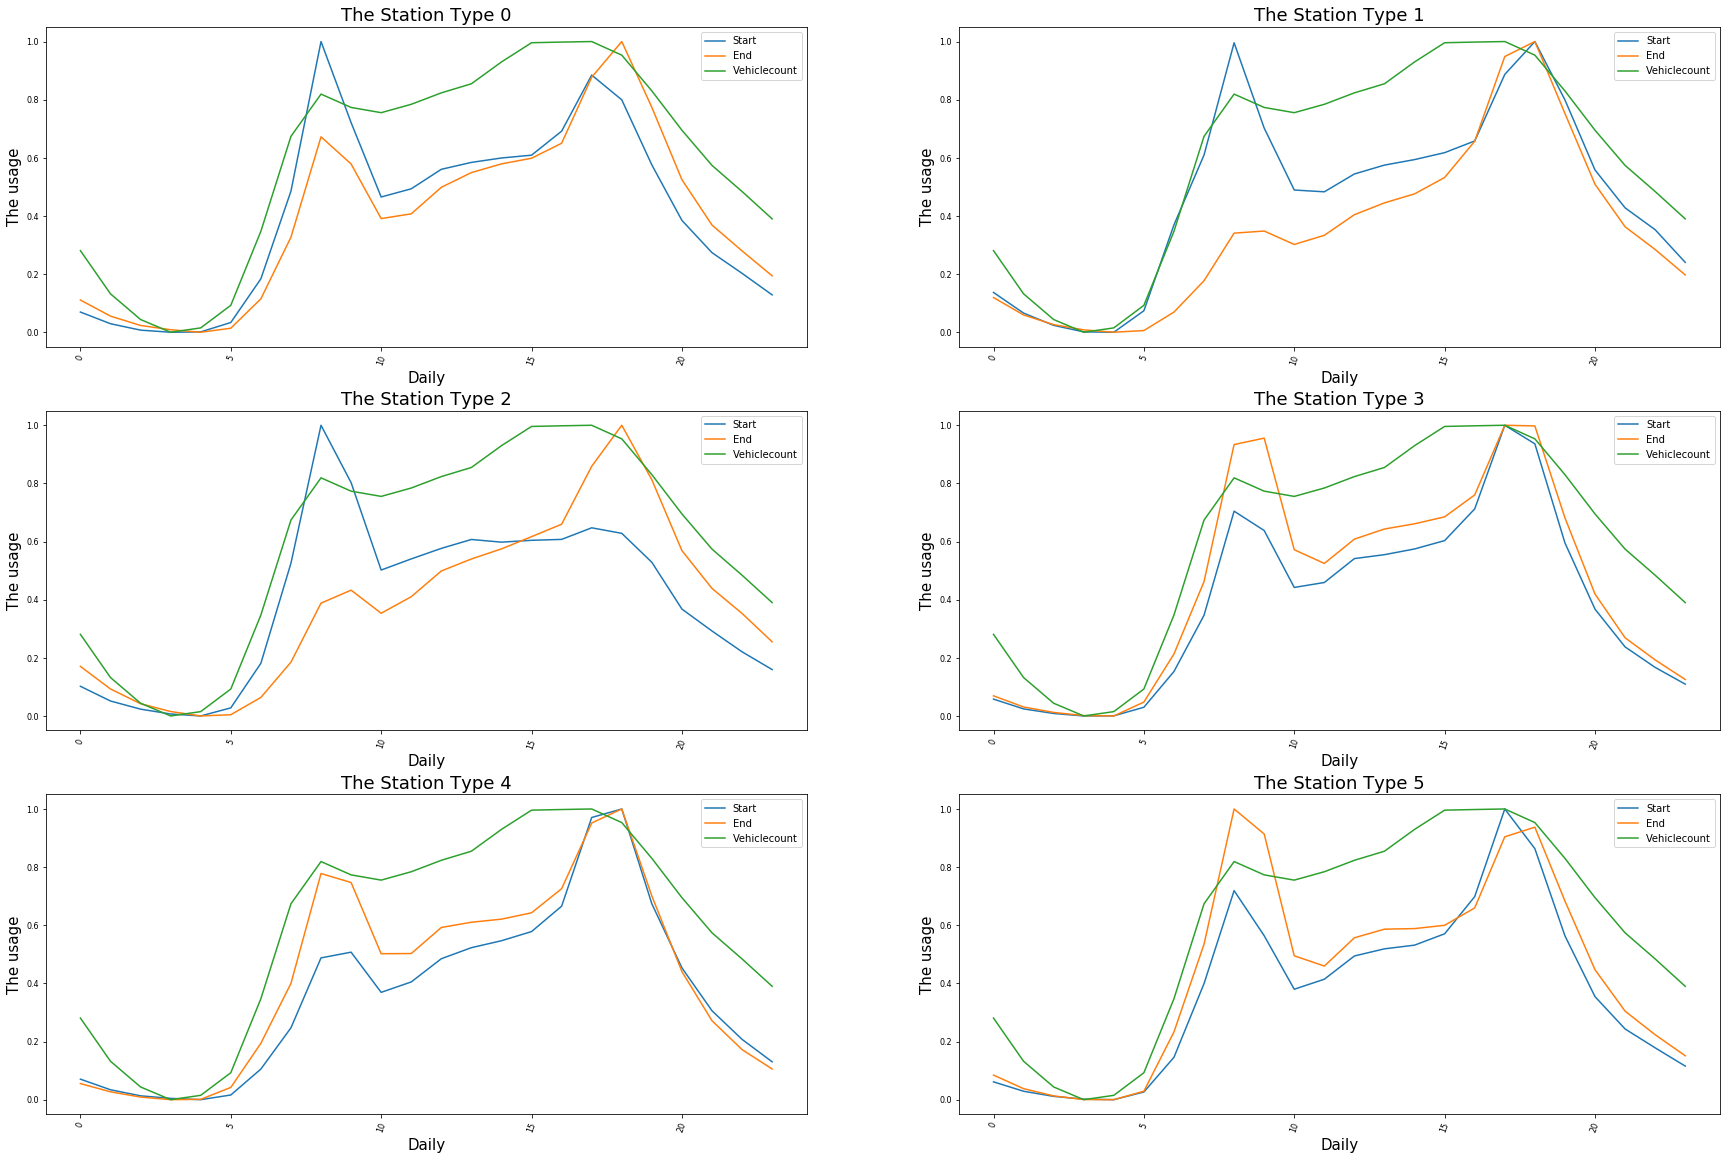

In [784]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, list(psd_scaled_2.iloc[:,i].values), label="Start")
    ax.plot(dailyRange, list(ped_scaled_3.iloc[:,i].values), label="End")
    ax.plot(dailyRange, vtse_scaled_1['Total vehicle_count'].values, label="Vehiclecount")
    plt.xticks(rotation=70)
    #ax.plot(dailyRange, emptysHour[i]*50, label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

In [785]:
# fig = pl.figure(figsize=(30,20))

# for i in range(6):
#     ax = fig.add_subplot(3,2,i+1)
#     t = np.arange(0.01, 10.0, 0.01)
#     s1 = np.exp(t)
#     ax1.plot(t, s1, 'b-')
#     ax1.set_xlabel('time (s)')
#     # Make the y-axis label, ticks and tick labels match the line color.
#     ax1.set_ylabel('exp', color='b')
#     ax1.tick_params('y', colors='b')

#     ax2 = ax1.twinx()
#     s2 = np.sin(2 * np.pi * t)
#     ax2.plot(t, s2, 'r.')
#     ax2.set_ylabel('sin', color='r')
#     ax2.tick_params('y', colors='r')

#     fig.tight_layout()
#     plt.show()

## Analyze Empty

In [786]:
#emptysHour

In [787]:
emptysHour_pd = pd.DataFrame(emptysHour)
emptysHour_tp = emptysHour_pd.T
emptysHour_tp.shape

(24, 6)

In [789]:
emptysHour_tp

,0,1,2,3,4,5
empytCount_0,12.282258,3.108696,11.247525,19.600000,14.500000,20.947917
empytCount_1,13.096774,3.695652,11.421782,20.085714,17.666667,20.000000
empytCount_2,8.975806,5.304348,11.889109,24.200000,22.333333,24.322917
empytCount_3,11.161290,4.347826,12.532673,26.914286,25.250000,18.041667
empytCount_4,6.782258,5.021739,8.601980,28.028571,29.416667,14.750000
empytCount_5,15.596774,3.673913,5.500990,21.571429,45.583333,18.531250
empytCount_6,19.120968,5.913043,8.807921,30.857143,25.583333,29.145833
empytCount_7,9.096774,3.434783,8.837624,21.685714,13.083333,15.343750
empytCount_8,3.532258,2.304348,9.655446,7.314286,8.750000,6.697917
empytCount_9,1.024194,3.804348,6.948515,5.657143,5.000000,5.375000


In [790]:
columnstemp=[]
for i in range(dailyDiff_tp.shape[1]):
    columnstemp.append('emptysHour_'+str(i))

In [791]:
emptysHour_tp.columns = columnstemp

In [792]:
vehicle_count['Time'][0]=vehicle_count['Time'][0].replace(" ", "")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [793]:
vehicle_count.head(1)

,Time,Total vehicle_count,Vehicle_count (%)
0,12:00-1:00AM,1593980.0,2.707619


In [794]:
emptysHour_tp['Time'] = list(vehicle_count['Time'])
print(emptysHour_tp.shape,vehicle_count.shape)
emptysHour_tp.head(1)

(24, 7) (24, 3)


,emptysHour_0,emptysHour_1,emptysHour_2,emptysHour_3,emptysHour_4,emptysHour_5,Time
empytCount_0,12.282258,3.108696,11.247525,19.6,14.5,20.947917,12:00-1:00AM


In [795]:
vehicles_trips_start_end_empty = vehicles_trips_start_end.merge(emptysHour_tp,how='outer', on='Time')
print(vehicles_trips_start_end_empty.shape,type(vehicles_trips_start_end_empty))
vehicles_trips_start_end_empty.head(2)

(24, 21) <class 'pandas.core.frame.DataFrame'>


,Time,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5,emptysHour_0,emptysHour_1,emptysHour_2,emptysHour_3,emptysHour_4,emptysHour_5
0,12:00-1:00AM,1593980.0,2.707619,80.411290,585.173913,4.841584,349.771429,682.500000,206.072917,120.346774,653.326087,7.601980,355.000000,501.833333,247.010417,12.282258,3.108696,11.247525,19.600000,14.500000,20.947917
1,1:00-2:00AM,1186001.0,2.014604,42.991935,344.239130,2.790099,182.285714,375.083333,116.864583,68.306452,375.608696,4.544554,190.942857,292.416667,138.760417,13.096774,3.695652,11.421782,20.085714,17.666667,20.000000


In [861]:
#emptysHour_tp
emptysHour_indexed = emptysHour_tp
emptysHour_indexed=emptysHour_tp.set_index('Time')
#keep = [columns for columns in vtse.columns if columns != 'Vehicle_count (%)']
#vtse[keep].head(2)

min_max_scaler_1 = MinMaxScaler()
#df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)
empty_to_scale = pd.DataFrame(min_max_scaler_1.fit_transform(emptysHour_indexed), columns=emptysHour_indexed.columns, \
                              index=emptysHour_indexed.index)

In [796]:
vtseE = vehicles_trips_start_end_empty
vtseE_indexed=vtseE.set_index('Time')
#keep = [columns for columns in vtse.columns if columns != 'Vehicle_count (%)']
#vtse[keep].head(2)

min_max_scaler_1 = MinMaxScaler()
#df_scaled_2 = pd.DataFrame(min_max_scaler_2.fit_transform(stations_nocapacity), columns=stations_nocapacity.columns, index=stations_nocapacity.index)
vtseE_scaled_1 = pd.DataFrame(min_max_scaler_1.fit_transform(vtseE_indexed), columns=vtseE_indexed.columns, index=vtseE_indexed.index)

In [797]:
vtseE_scaled_1.head(2)

,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5,emptysHour_0,emptysHour_1,emptysHour_2,emptysHour_3,emptysHour_4,emptysHour_5
Time,,,,,,,,,,,,,,,,,,,,
12:00-1:00AM,0.280709,0.280709,0.06944,0.136857,0.101986,0.057939,0.070549,0.061325,0.110804,0.119327,0.170453,0.069269,0.055390,0.084625,0.622103,0.045528,0.375932,0.614104,0.315596,0.676664
1:00-2:00AM,0.132112,0.132112,0.02928,0.065856,0.051432,0.024268,0.034088,0.028996,0.055462,0.059485,0.092842,0.030832,0.026995,0.037874,0.667112,0.067480,0.383307,0.630754,0.385321,0.639277


In [798]:
vtseE_s_fact=vtseE_scaled_1

In [799]:
for i in vtseE_scaled_1.columns:
    try:
        vtseE_s_fact[i] = vtseE_scaled_1[i].apply(float)
    except ValueError:
        vtseE_s_fact[i] = pd.factorize(vtseE_scaled_1[i])[0]

In [800]:
vtseE_s_fact.head(2)

,Total vehicle_count,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5,emptysHour_0,emptysHour_1,emptysHour_2,emptysHour_3,emptysHour_4,emptysHour_5
Time,,,,,,,,,,,,,,,,,,,,
12:00-1:00AM,0.280709,0.280709,0.06944,0.136857,0.101986,0.057939,0.070549,0.061325,0.110804,0.119327,0.170453,0.069269,0.055390,0.084625,0.622103,0.045528,0.375932,0.614104,0.315596,0.676664
1:00-2:00AM,0.132112,0.132112,0.02928,0.065856,0.051432,0.024268,0.034088,0.028996,0.055462,0.059485,0.092842,0.030832,0.026995,0.037874,0.667112,0.067480,0.383307,0.630754,0.385321,0.639277


In [801]:
vtseE_s_fact = vtseE_s_fact.rename(columns={"Total vehicle_count": "Y"})
vtseE_s_fact.head(2)

,Y,Vehicle_count (%),St_Count_0,St_Count_1,St_Count_2,St_Count_3,St_Count_4,St_Count_5,End_Count_0,End_Count_1,End_Count_2,End_Count_3,End_Count_4,End_Count_5,emptysHour_0,emptysHour_1,emptysHour_2,emptysHour_3,emptysHour_4,emptysHour_5
Time,,,,,,,,,,,,,,,,,,,,
12:00-1:00AM,0.280709,0.280709,0.06944,0.136857,0.101986,0.057939,0.070549,0.061325,0.110804,0.119327,0.170453,0.069269,0.055390,0.084625,0.622103,0.045528,0.375932,0.614104,0.315596,0.676664
1:00-2:00AM,0.132112,0.132112,0.02928,0.065856,0.051432,0.024268,0.034088,0.028996,0.055462,0.059485,0.092842,0.030832,0.026995,0.037874,0.667112,0.067480,0.383307,0.630754,0.385321,0.639277


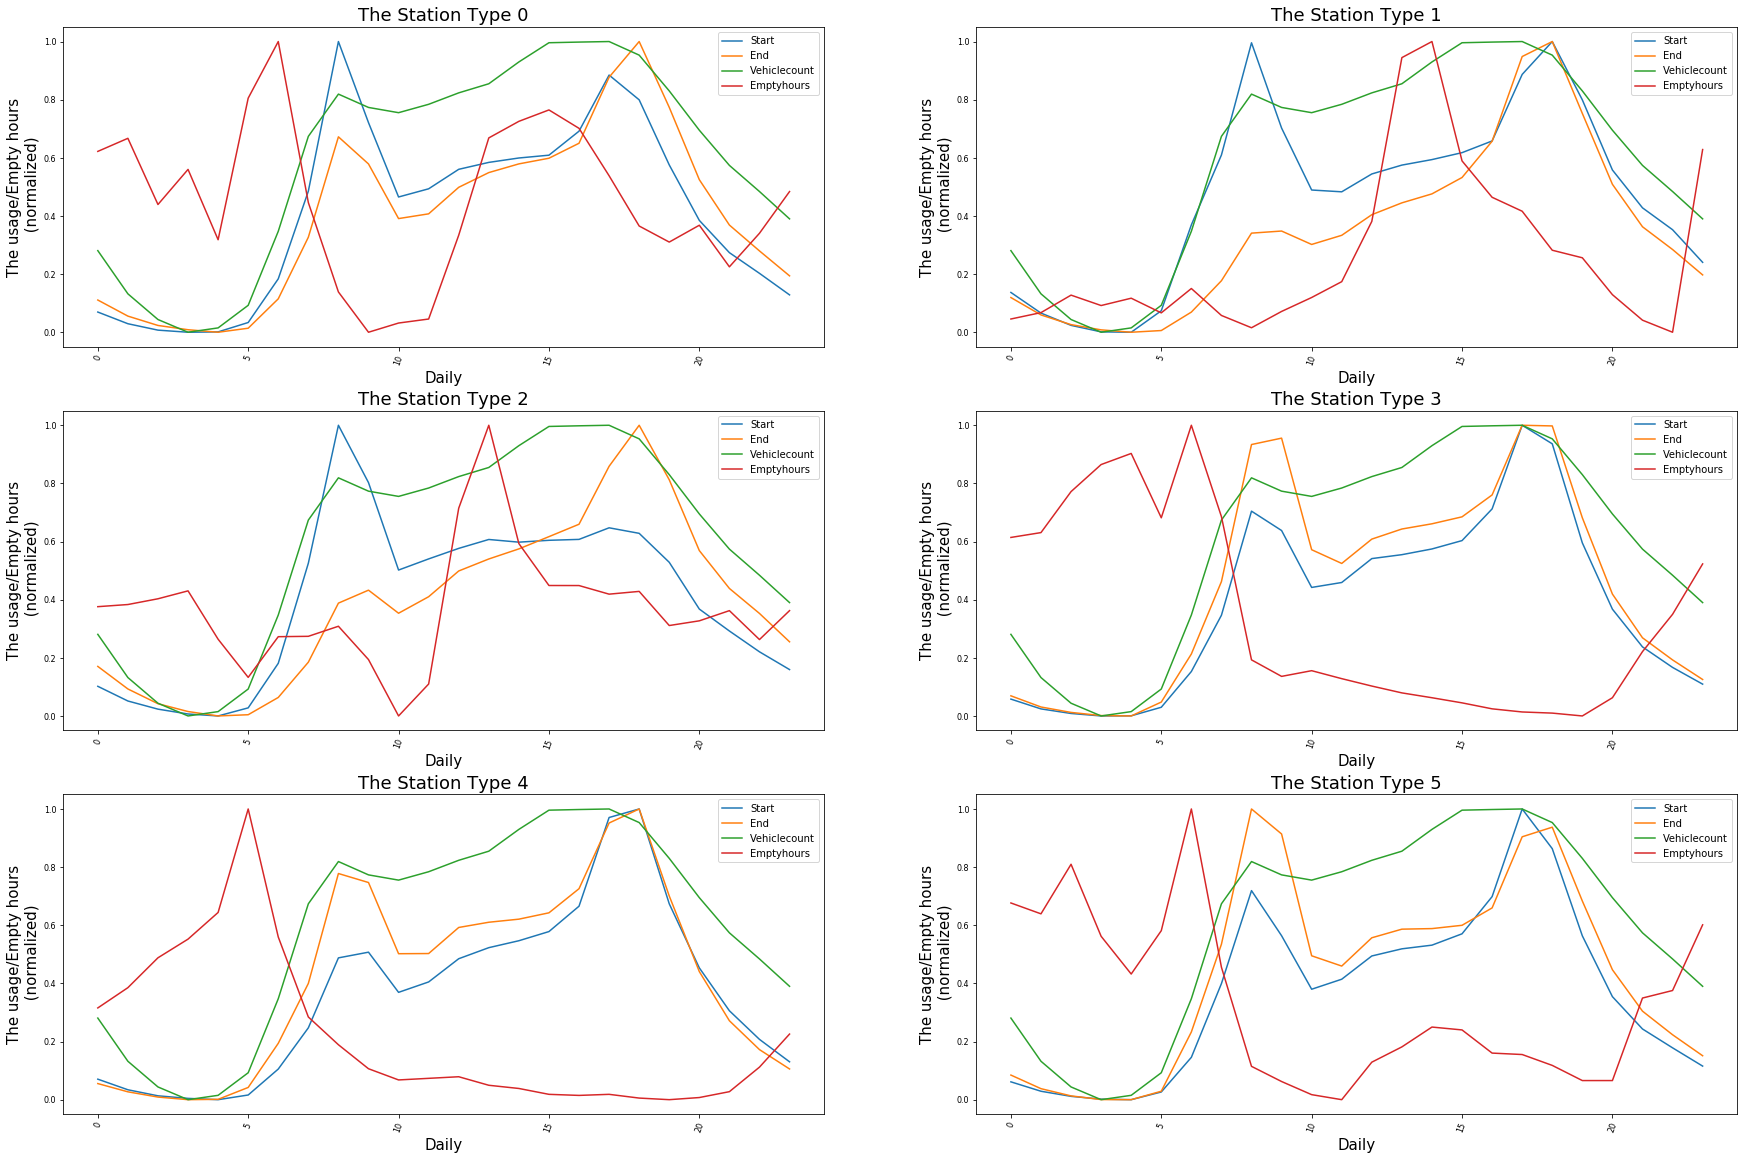

In [869]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage/Empty hours\n (normalized)",fontsize=15)
    ax.plot(dailyRange, list(psd_scaled_2.iloc[:,i].values), label="Start")
    ax.plot(dailyRange, list(ped_scaled_3.iloc[:,i].values), label="End")
    ax.plot(dailyRange, vtse_scaled_1['Total vehicle_count'].values, label="Vehiclecount")
    ax.plot(dailyRange, list(empty_to_scale.iloc[:,i].values), label="Emptyhours")
    plt.xticks(rotation=70)
    #ax.plot(dailyRange, emptysHour[i]*50, label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

In [802]:
#Check if empty??
#auxiliary function to compute correlations between columns where both have data
def NZPopCorr(col1,col2):
    ind=(vtseE_s_fact[col1]>0)&(vtseE_s_fact[col2]>0)
    return np.corrcoef(vtseE_s_fact[col1][ind],vtseE_s_fact[col2][ind])[0][1]

In [803]:
columnas=vtseE_s_fact.columns
columnas.shape

(20,)

In [804]:
Act=list(columnas)
(Act[2:20])

['St_Count_0',
 'St_Count_1',
 'St_Count_2',
 'St_Count_3',
 'St_Count_4',
 'St_Count_5',
 'End_Count_0',
 'End_Count_1',
 'End_Count_2',
 'End_Count_3',
 'End_Count_4',
 'End_Count_5',
 'emptysHour_0',
 'emptysHour_1',
 'emptysHour_2',
 'emptysHour_3',
 'emptysHour_4',
 'emptysHour_5']

In [844]:
#output a table with correlations between activities and population counts
Act=list(columnas)

print ('\tActivity|{}\t|{}\t|{}\t|{}\t|{}\t|{}\t|'.format(\
Act[2],Act[3],Act[4],Act[5],Act[6],Act[7]))
C=[]
for A1 in Act[2:20]:
    C+=[NZPopCorr(A1,'Y')]   

#for i, A1 in ennumerate(Act):
#print([A1]+C[0:6])
print('%16s |%.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t|'%tuple(['Y']+C[0:6]))

	Activity|St_Count_0	|St_Count_1	|St_Count_2	|St_Count_3	|St_Count_4	|St_Count_5	|
               Y |0.91366 	| 0.88463 	| 0.88224 	| 0.92227 	| 0.89700 	| 0.91177 	|


In [845]:
#output a table with correlations between activities and population counts
Act=list(columnas)

print ('\tActivity|{}\t|{}\t|{}\t|{}\t|{}\t|{}\t|'.format(\
Act[8],Act[9],Act[10],Act[11],Act[12],Act[13]))
C=[]
for A1 in Act[2:20]:
    C+=[NZPopCorr(A1,'Y')]   
print('%16s |%.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t|'%tuple(['Y']+C[6:12]))

	Activity|End_Count_0	|End_Count_1	|End_Count_2	|End_Count_3	|End_Count_4	|End_Count_5	|
               Y |0.90976 	| 0.82169 	| 0.85724 	| 0.90568 	| 0.92992 	| 0.88010 	|


In [852]:
#output a table with correlations between activities and population counts
Act=list(columnas)

print ('\tActivity|{}\t|{}\t|{}\t|{}\t|{}\t|{}\t|'.format(\
Act[14],Act[15],Act[16],Act[17],Act[18],Act[19]))
C=[]
for A1 in Act[2:20]:
    C+=[NZPopCorr(A1,'Y')]   
print('%16s |%.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t| %.5f \t|'%tuple(['Y']+C[12:18]))

	Activity|emptysHour_0	|emptysHour_1	|emptysHour_2	|emptysHour_3	|emptysHour_4	|emptysHour_5	|
               Y |-0.15936 	| 0.46300 	| 0.35903 	| -0.88598 	| -0.83386 	| -0.78659 	|


In [860]:
for A1 in Act[2:20]:
    lm = smf.ols(formula='Y~'+A1, data = vtseE_s_fact.loc[vtseE_s_fact[A1]>0]).fit()
    print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     106.1
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.15e-09
Time:                        03:39:04   Log-Likelihood:                 14.201
No. Observations:                  23   AIC:                            -24.40
Df Residuals:                      21   BIC:                            -22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1954      0.050      3.904      0.0

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.303
Date:                Mon, 10 Dec 2018   Prob (F-statistic):              0.144
Time:                        03:39:04   Log-Likelihood:                -6.8496
No. Observations:                  23   AIC:                             17.70
Df Residuals:                      21   BIC:                             19.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.3630      0.164      2.219   

In [ ]:
# fig = pl.figure(figsize=(10,10))
# ax = fig.add_subplot(221)
# ax.plot(df_.x, df_.y, '.', label="data")
# ax.set_ylabel("mass shootings pp (x10,000,000)")
# ax.set_xlabel("civilian fire arms pp")
# pl.legend()


# ax = fig.add_subplot(222)
# ax.plot(df_.x, df_.y, '.', label="data")
# ax.plot(df_.x,
#         modelOLS.fittedvalues, '.', label="OSL prediction")
# ax.plot([df_.x.min(), df_.x.max()],
#         modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
#         modelOLS.params[0], 'k-', alpha=0.6, label="OLS fit line")
# ax.set_ylabel("mass shootings pp (x10,000,000)")
# ax.set_xlabel("civilian fire arms pp")
# pl.legend()


# ax = fig.add_subplot(223)
# ax.plot(df_.x, df_.y, '.', label="data")
# ax.plot([df_.x.min(), df_.x.max()],
#         modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
#         modelOLS.params[0], 'k-', label="OLS fit line")
# ax.errorbar(df_.x,
#             modelOLS.fittedvalues, yerr=ci, 
#             color='k', alpha=0.5, label="prediction confidence interval")
# ax.set_ylabel("mass shootings pp (x10,000,000)")
# ax.set_xlabel("civilian fire arms pp")
# pl.legend()

# ax = fig.add_subplot(224)
# ax.plot(df_.x, df_.y, '.', label="data")
# ax.plot([df_.x.min(), df_.x.max()],
#         modelOLS.params[1] * np.array([df_.x.min(), df_.x.max()]) +
#         modelOLS.params[0], 'k-')
# ax.errorbar(df_.x,
#             modelOLS.fittedvalues, yerr=ci, 
#             color='k', alpha=0.5, label="prediction confidence interval")
# ax.fill_between([df_.x.min(), df_.x.max()],
#         (modelOLS.conf_int()[0].x) * np.array([df_.x.min(), df_.x.max()]) +
#         modelOLS.conf_int()[0].const,
#         (modelOLS.conf_int()[1].x) * np.array([df_.x.min(), df_.x.max()]) +
#         modelOLS.conf_int()[1].const, color='k', alpha=0.3, label="OLS confidence band")
# ax.set_ylabel("mass shootings pp (x10,000,000)")
# ax.set_xlabel("civilian fire arms pp")
# pl.legend()


# xx = st.add_constant(np.sort(df_.x)) 
# axsort = np.argsort(df_.x)
# xsort = df_.x[axsort]
# y_hat = modelOLS.predict(xx) # x is an array 

# y_err = df_.y[axsort] - y_hat

# mean_x = xx.T[1].mean()

# nn = len(xx)
# #degreed of freedom: numbr of points - number of model parameters 
# dof = nn - modelOLS.df_model - 1

# t = stats.t.ppf(1-0.025, df=dof)

# s_err = np.sum(np.power(y_err, 2))

# conf = t * np.sqrt((s_err / (nn - 2))*(1.0 / nn + (np.power((xsort - mean_x),2) / 
#      ((np.sum(np.power(xsort, 2))) - nn*(np.power(mean_x, 2))))))
# upper = y_hat + conf
# lower = y_hat - conf
# pl.figure(figsize=(10,5))
# #pl.plot(df_.x, df_.y, '.')
# pl.plot(df_.x,
#         modelOLS.fittedvalues, '-')
# pl.fill_between(df_.x[axsort], lower, upper, color='#888888', alpha=0.4, label="manual confidence")
# sns.regplot(x="x", y="y", data=df_);